In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval
import pickle

In [ ]:
p='/content/tmdb_5000_credits.csv'
credits_df = pd.read_csv('/content/tmdb_5000_credits.csv')
movies_df = pd.read_csv('/content/tmdb_5000_movies.csv',error_bad_lines=False,engine='python')
movies_df.head()
credits_df.head()
credits_df.columns = ['id','title','cast','crew']
movies_df = movies_df.merge(credits_df, on="title")
movies_df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,budget,genres,homepage,id_x,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,id_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies_df.shape
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id_x', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_y', 'cast', 'crew'],
      dtype='object')

In [ ]:
movies_df =movies_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [ ]:
C = movies_df["vote_average"].mean()
m = movies_df["vote_count"].quantile(0.9)

In [ ]:
print("C: ", C)
print("m: ", m)
new_movies_df = movies_df.copy().loc[movies_df["vote_count"] >= m]
print(new_movies_df.shape)

C:  6.092514036182159
m:  1842.199999999998
(481, 23)


In [ ]:
def weighted_rating(x, C=C, m=m):
    v = x["vote_count"]
    R = x["vote_average"]

    return (v / (v + m) * R) + (m / (v + m) * C)

In [ ]:
new_movies_df["score"] = new_movies_df.apply(weighted_rating, axis=1)
new_movies_df = new_movies_df.sort_values('score', ascending=False)


In [ ]:
new_movies_df


,budget,genres,homepage,id_x,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,id_y,cast,crew,score
1887,25000000,"[{""id"": 18, ""name"": ""drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,the shawshank redemption,framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""castle rock entertainment"", ""id"": 97}]",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",released,fear can hold you prisoner. hope can set you f...,the shawshank redemption,8.5,8205,278,"[{""cast_id"": 3, ""character"": ""andy dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.058576
662,63000000,"[{""id"": 18, ""name"": ""drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,fight club,a ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""regency enterprises"", ""id"": 508}, {...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",released,mischief. mayhem. soap.,fight club,8.3,9413,550,"[{""cast_id"": 4, ""character"": ""the narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.938689
65,185000000,"[{""id"": 18, ""name"": ""drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,the dark knight,batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""dc comics"", ""id"": 429}, {""name"": ""l...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}, {""iso...",released,why so serious?,the dark knight,8.2,12002,155,"[{""cast_id"": 35, ""character"": ""bruce wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.919564
3237,8000000,"[{""id"": 53, ""name"": ""thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,pulp fiction,"a burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""miramax films"", ""id"": 14}, {""name"":...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}, {""iso...",released,just because you are a character doesn't mean ...,pulp fiction,8.3,8428,680,"[{""cast_id"": 2, ""character"": ""vincent vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904036
96,160000000,"[{""id"": 28, ""name"": ""action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,inception,"cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""legendary pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}, {""iso...",released,your mind is the scene of the crime.,inception,8.1,13752,27205,"[{""cast_id"": 1, ""character"": ""dom cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.862848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,200000000,"[{""id"": 12, ""name"": ""adventure""}, {""id"": 28, ""...",http://greenlanternmovie.warnerbros.com/,44912,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 4375...",en,green lantern,"for centuries, a small but powerful force of w...",51.872839,"[{""name"": ""de line pictures"", ""id"": 2609}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",released,"in our darkest hour, there will be light.",green lantern,5.1,2487,44912,"[{""cast_id"": 6, ""character"": ""hal jordan / gre...","[{""credit_id"": ""52fe46a3c3a36847f8109f09"", ""de...",5.522343
337,92000000,"[{""id"": 28, ""name"": ""action""}, {""id"": 53, ""nam...",http://www.diehardmovie.com/,47964,"[{""id"": 258, ""name"": ""bomb""}, {""id"": 591, ""nam...",en,a good day to die hard,"iconoclastic, take-no-prisoners cop john mccla...",65.402595,"[{""name"": ""ingenious media"", ""id"": 290}, {""nam...",...,"[{""iso_639_1"": 

In [ ]:
new_movies_df.to_csv('new_movies_df',index=False)

In [ ]:
new_movies_df.columns

Index(['budget', 'genres', 'homepage', 'id_x', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_y', 'cast', 'crew', 'score'],
      dtype='object')

In [ ]:
! cat new_movies_df.csv

cat: new_movies_df.csv: No such file or directory


In [ ]:
new_movies_df[["title", "vote_count", "vote_average", "score"]].head(10)

,title,vote_count,vote_average,score
1887,the shawshank redemption,8205,8.5,8.058576
662,fight club,9413,8.3,7.938689
65,the dark knight,12002,8.2,7.919564
3237,pulp fiction,8428,8.3,7.904036
96,inception,13752,8.1,7.862848
3342,the godfather,5893,8.4,7.850454
95,interstellar,10867,8.1,7.809015
809,forrest gump,7927,8.2,7.802587
329,the lord of the rings: the return of the king,8064,8.1,7.726679
1996,the empire strikes back,5879,8.2,7.697175


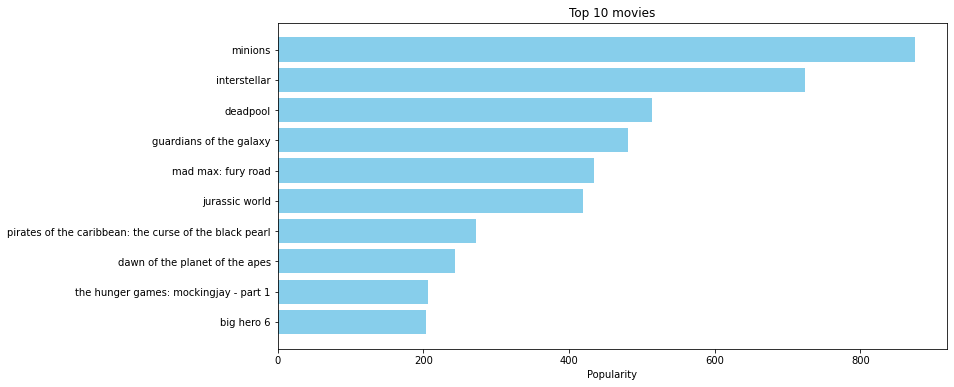

In [ ]:
def plot():
    popularity = movies_df.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity['title'].head(10), popularity["popularity"].head(10), align="center", color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Top 10 movies")
    plt.xlabel("Popularity")
    plt.show()

plot()

In [ ]:
print(movies_df["overview"].head(5))

0    in the 22nd century, a paraplegic marine is di...
1    captain barbossa, long believed to be dead, ha...
2    a cryptic message from bond’s past sends him o...
3    following the death of district attorney harve...
4    john carter is a war-weary, former military ca...
Name: overview, dtype: object


In [ ]:
tfidf = TfidfVectorizer(stop_words="english")
movies_df["overview"] = movies_df["overview"].fillna("")

In [ ]:
tfidf_matrix = tfidf.fit_transform(movies_df["overview"])
print(tfidf_matrix.shape)

(4809, 20978)


In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)

(4809, 4809)


In [ ]:
indices = pd.Series(movies_df.index, index=movies_df["title"]).drop_duplicates()
print(indices.head())

title
avatar                                      0
pirates of the caribbean: at world's end    1
spectre                                     2
the dark knight rises                       3
john carter                                 4
dtype: int64


In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    # (a, b) where a is id of movie, b is sim_score

    movies_indices = [ind[0] for ind in sim_scores]
    movies = movies_df["title"].iloc[movies_indices]
    return movies

In [ ]:
print("################ Content Based Filtering - plot#############")
print()
print("Recommendations for The Dark Knight Rises")
print(get_recommendations("the dark knight rises"))
print()
print("Recommendations for Avengers")
print(get_recommendations("the avengers"))

################ Content Based Filtering - plot#############

Recommendations for The Dark Knight Rises
65                              the dark knight
299                              batman forever
428                              batman returns
1362                                     batman
1363                                     batman
3861    batman: the dark knight returns, part 2
2513                                  slow burn
119                               batman begins
1184                                        jfk
9            batman v superman: dawn of justice
Name: title, dtype: object

Recommendations for Avengers
7               avengers: age of ultron
3149                            plastic
1721                            timecop
4131                 this thing of ours
3316              thank you for smoking
3038                      the corruptor
588     wall street: money never sleeps
2142         team america: world police
1474                       the fountain

In [ ]:
features = ["cast", "crew", "keywords", "genres"]

In [ ]:
for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

movies_df.head()

,budget,genres,homepage,id_x,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,id_y,cast,crew
0,237000000,"[{'id': 28, 'name': 'action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,avatar,"in the 22nd century, a paraplegic marine is di...",150.437577,"[{""name"": ""ingenious film partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""english""}, {""iso...",released,enter the world of pandora.,avatar,7.2,11800,19995,"[{'cast_id': 242, 'character': 'jake sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,pirates of the caribbean: at world's end,"captain barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""walt disney pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",released,"at the end of the world, the adventure begins.",pirates of the caribbean: at world's end,6.9,4500,285,"[{'cast_id': 4, 'character': 'captain jack spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,spectre,a cryptic message from bond’s past sends him o...,107.376788,"[{""name"": ""columbia pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""fran\u00e7ais""},...",released,a plan no one escapes,spectre,6.3,4466,206647,"[{'cast_id': 1, 'character': 'james bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,the dark knight rises,following the death of district attorney harve...,112.312950,"[{""name"": ""legendary pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",released,the legend ends,the dark knight rises,7.6,9106,49026,"[{'cast_id': 2, 'character': 'bruce wayne / ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,john carter,"john carter is a war-weary, former military ca...",43.926995,"[{""name"": ""walt disney pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",released,"lost in our world, found in another.",john carter,6.1,2124,49529,"[{'cast_id': 5, 'character': 'john carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [ ]:
def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

In [ ]:
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]

        if len(names) > 3:
            names = names[:3]

        return names

    return []

In [ ]:
movies_df["director"] = movies_df["crew"].apply(get_director)

features = ["cast", "keywords", "genres"]

In [ ]:
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [ ]:
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,avatar,"[sam worthington, zoe saldana, sigourney weaver]",NaN,"[culture clash, future, space war]","[action, adventure, fantasy]"
1,pirates of the caribbean: at world's end,"[johnny depp, orlando bloom, keira knightley]",NaN,"[ocean, drug abuse, exotic island]","[adventure, fantasy, action]"
2,spectre,"[daniel craig, christoph waltz, léa seydoux]",NaN,"[spy, based on novel, secret agent]","[action, adventure, crime]"
3,the dark knight rises,"[christian bale, michael caine, gary oldman]",NaN,"[dc comics, crime fighter, terrorist]","[action, crime, drama]"
4,john carter,"[taylor kitsch, lynn collins, samantha morton]",NaN,"[based on novel, mars, medallion]","[action, adventure, science fiction]"


In [ ]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ""

In [ ]:
movies_df ['title'] = movies_df['title'].str.replace(" ","")

In [ ]:
movies_df.head(10)

,budget,genres,homepage,id_x,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,id_y,cast,crew,director
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,avatar,"in the 22nd century, a paraplegic marine is di...",150.437577,"[{""name"": ""ingenious film partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}, {""iso...",released,enter the world of pandora.,avatar,7.2,11800,19995,"[sam worthington, zoe saldana, sigourney weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",NaN
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,pirates of the caribbean: at world's end,"captain barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""walt disney pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",released,"at the end of the world, the adventure begins.",piratesofthecaribbean:atworld'send,6.9,4500,285,"[johnny depp, orlando bloom, keira knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",NaN
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,spectre,a cryptic message from bond’s past sends him o...,107.376788,"[{""name"": ""columbia pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""fran\u00e7ais""},...",released,a plan no one escapes,spectre,6.3,4466,206647,"[daniel craig, christoph waltz, léa seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",NaN
3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist]",en,the dark knight rises,following the death of district attorney harve...,112.312950,"[{""name"": ""legendary pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",released,the legend ends,thedarkknightrises,7.6,9106,49026,"[christian bale, michael caine, gary oldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",NaN
4,260000000,"[action, adventure, science fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion]",en,john carter,"john carter is a war-weary, former military ca...",43.926995,"[{""name"": ""walt disney pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",released,"lost in our world, found in another.",johncarter,6.1,2124,49529,"[taylor kitsch, lynn collins, samantha morton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",NaN
5,258000000,"[fantasy, action, adventure]",http://www.sonypictures.com/movies/spider-man3/,559,"[dual identity, amnesia, sandstorm]",en,spider-man 3,the seemingly invincible spider-man goes up ag...,115.699814,"[{""name"": ""columbia pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}, {""iso...",released,the battle within.,spider-man3,5.9,3576,559,"[tobey maguire, kirsten dunst, james franco]","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...",NaN
6,260000000,"[animation, family]",http://disney.go.com/disneypictures/tangled/,38757,"[hostage, magic, horse]",en,tangled,when the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""walt disney pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",released,they're taking adventure to new lengths.,tangled,7.4,3330,38757,"[zachary levi, mandy moore, donna murphy]","[{'credit_id': '52fe46db9251416c91062101', 'de...",NaN
7,280000000,"[action, adventure, science fiction]",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[marvel comic, sequel, superhero]",en,avengers: age of ultron,when tony stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""marvel studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""english""}]",r

In [ ]:
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [ ]:
movies_df["soup"] = movies_df.apply(create_soup, axis=1)
print(movies_df["soup"].head())

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object


In [ ]:
count_vectorizer = CountVectorizer(stop_words="english")
count_matrix = count_vectorizer.fit_transform(movies_df["soup"])

In [ ]:
count_matrix

<4809x9290 sparse matrix of type '<class 'numpy.int64'>'
	with 38200 stored elements in Compressed Sparse Row format>

In [ ]:
print(count_matrix.shape)

(4809, 9290)


In [ ]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim2)

[[1.         0.33333333 0.22222222 ... 0.         0.         0.        ]
 [0.33333333 1.         0.22222222 ... 0.         0.         0.        ]
 [0.22222222 0.22222222 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

In [ ]:
#print("################ Content Based System - metadata #############")
#print("Recommendations for The Dark Knight Rises")
#print(get_recommendations("The Dark Knight Rises", cosine_sim2))
#print()
movie=input("Enter your favourite movie! : ")
print("Recommendations for : ",movie)
movie=movie.lower()
print(get_recommendations(movie, cosine_sim2))

Enter your favourite movie! : spider-man
Recommendations for :  spider-man
5                               spider-man3
30                              spider-man2
2163                            daybreakers
2598                     highlander:endgame
1269    cirquedufreak:thevampire'sassistant
547                             suckerpunch
71          themummy:tombofthedragonemperor
381            thenutcracker:theuntoldstory
786                          themonkeyking2
3612                         thebeastmaster
Name: title, dtype: object
